Метод разделимых наименьших квадратов. Квантовые дефекты
Используя метод разделимых наименьших квадратов, построим модель вида$$
y = \beta_1 - \beta_2 x - \frac{\arctan(\frac{\beta_3}{x-\beta_4})}{\pi}
$$

Предиктор $x$ – возбужденное состояние энергии, переменная отклика $y$ – число квантовых дефектов.

In [95]:
import math
import numpy as np
from scipy.optimize import minimize, curve_fit
from numpy.linalg import lstsq,norm
import matplotlib.pyplot as plt

In [3]:
data = """-4868.68      0.252429  
       -4868.09      0.252141  
       -4867.41      0.251809  
       -3375.19      0.297989  
       -3373.14      0.296257  
       -3372.03      0.295319  
       -2473.74      0.339603  
       -2472.35      0.337731  
       -2469.45      0.333820  
       -1894.65      0.389510  
       -1893.40      0.386998  
       -1497.24      0.438864  
       -1495.85      0.434887  
       -1493.41      0.427893  
       -1208.68      0.471568  
       -1206.18      0.461699  
       -1206.04      0.461144  
        -997.92      0.513532  
        -996.61      0.506641  
        -996.31      0.505062  
        -834.94      0.535648  
        -834.66      0.533726  
        -710.03      0.568064  
        -530.16      0.612886  
        -464.17      0.624169""".split("      ")

In [4]:
data = [float(x.strip('\n').strip(' ')) for x in data]
data

[-4868.68,
 0.252429,
 -4868.09,
 0.252141,
 -4867.41,
 0.251809,
 -3375.19,
 0.297989,
 -3373.14,
 0.296257,
 -3372.03,
 0.295319,
 -2473.74,
 0.339603,
 -2472.35,
 0.337731,
 -2469.45,
 0.33382,
 -1894.65,
 0.38951,
 -1893.4,
 0.386998,
 -1497.24,
 0.438864,
 -1495.85,
 0.434887,
 -1493.41,
 0.427893,
 -1208.68,
 0.471568,
 -1206.18,
 0.461699,
 -1206.04,
 0.461144,
 -997.92,
 0.513532,
 -996.61,
 0.506641,
 -996.31,
 0.505062,
 -834.94,
 0.535648,
 -834.66,
 0.533726,
 -710.03,
 0.568064,
 -530.16,
 0.612886,
 -464.17,
 0.624169]

In [5]:
X = np.array(data[::2])
Y = np.array(data[1::2])

In [18]:
print(X,Y)

[-4868.68 -4868.09 -4867.41 -3375.19 -3373.14 -3372.03 -2473.74 -2472.35
 -2469.45 -1894.65 -1893.4  -1497.24 -1495.85 -1493.41 -1208.68 -1206.18
 -1206.04  -997.92  -996.61  -996.31  -834.94  -834.66  -710.03  -530.16
  -464.17] [0.252429 0.252141 0.251809 0.297989 0.296257 0.295319 0.339603 0.337731
 0.33382  0.38951  0.386998 0.438864 0.434887 0.427893 0.471568 0.461699
 0.461144 0.513532 0.506641 0.505062 0.535648 0.533726 0.568064 0.612886
 0.624169]


#### Построим функцию модели

In [77]:
def model(x,b1,b2,b3,b4):
    return b1 - b2*x - np.arctan(b3/(x-b4))/math.pi

#### Рассмотрим параметры полученные нелинейным МНК как эталонное решение для сравнения

In [78]:
b1_nl,b2_nl,b3_nl,b4_nl = curve_fit(model,X,Y)[0]
print(b1_nl,b2_nl,b3_nl,b4_nl)
#curve_fit(model,X,Y)[0]

0.2019684894050175 -6.1953246821417266e-06 1204.4563632015252 -181.343091966604


In [80]:
Y_model = model(X,b1_nl,b2_nl,b3_nl,b4_nl)
Y_model

array([0.25186613, 0.25187945, 0.2518948 , 0.29584892, 0.29592912,
       0.29597257, 0.340632  , 0.34072012, 0.34090421, 0.38527082,
       0.38538788, 0.4286273 , 0.42880347, 0.42911318, 0.46968918,
       0.47008751, 0.47010984, 0.50614261, 0.50638803, 0.50644426,
       0.53853787, 0.53859677, 0.56591015, 0.60895456, 0.62567826])

In [81]:
norm(Y_model-Y,ord=2) # Мера приближения для сравнения

0.02224518989156376

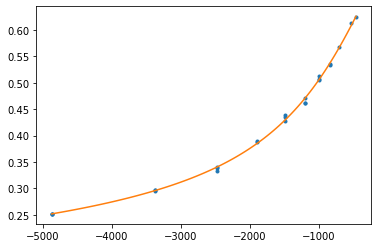

In [85]:
plt.plot(X,Y,'.')
X_ls = np.linspace(X[0],X[-1],100)
plt.plot(X_ls,model(X_ls,b1_nl,b2_nl,b3_nl,b4_nl)) # Видим на графике хорошее приближение

### Реализуем метод разделенных наименьших квадратов, сначала воспользуемся в качестве внешней оптимизации нелинейных параметров функцию minimize библиотеки scipy

In [8]:
def fun(b,x,y):
    b3,b4 = b[0],b[1]
    b1,b2 = lin_opt(x,y,b3,b4)[0]
    return norm(model(x,b1,b2,b3,b4) - y, ord=2)

def lin_opt(X,Y,b3,b4):
    atan = np.arctan(b3/(X-b4))/math.pi
    A = np.concatenate((np.array([1]*len(X)).reshape((-1,1)),X.reshape((-1,1))),axis=1)
    b1_2 = lstsq(A,Y+atan)
    return b1_2

In [123]:
b3,b4 = minimize(fun,(5,10),args=(X,Y),method='Powell').x #Воспользуемся методом Powell так как он дает результат наиболее близкий к эталонному
b1,b2 = lin_opt(X,Y,b3,b4)[0]
print(b1,b2,b3,b4)

0.16486912537146559 2.5149166617436033e-08 1322.0409115361765 -288.1585580384265


C:\Users\burzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


#### Полученные значения отличаются от эталонных, рассмотрим качество полученного приближения

In [128]:
def fit_quality(model,b1,b2,b3,b4):
    Y_model = model(X,b1,b2,b3,b4)
    print('Мера приближения: ',norm(Y_model-Y,ord=2))
    plt.plot(X,Y,'.')
    X_ls = np.linspace(X[0],X[-1],100)
    plt.plot(X_ls,model(X_ls,b1,b2,b3,b4)) # Видим на графике хорошее приближение

Мера приближения:  0.02416633425269449


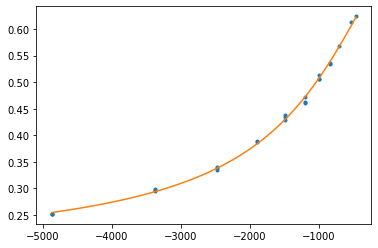

In [129]:
fit_quality(model,b1,b2,b3,b4)

### Значения полученные с помощью функции minimize(которая не обязана доставлять глобальный минимум) дают локальным минимум функции тогда как эталонные вероятнее глобальный, ввиду того что мера качества в эталонном приближении выше

In [138]:
def quad_poly_model(x,c1,c2,c3):
    return c1+c2*x+c3*x**2

In [139]:
c1,c2,c3 = curve_fit(quad_poly_model,X,Y)[0]
print(c1,c2,c3)

0.6866879386302647 0.00019763582819480596 2.2576126634816403e-08


In [141]:
Y_model = quad_poly_model(X,c1,c2,c3)
Y_model

array([0.25960785, 0.25959477, 0.2595797 , 0.27681461, 0.27690745,
       0.27695779, 0.3359404 , 0.3360599 , 0.3363095 , 0.39327871,
       0.39341885, 0.4413892 , 0.44156999, 0.44188755, 0.48079109,
       0.48114889, 0.48116893, 0.5119455 , 0.51214542, 0.51219121,
       0.53741226, 0.53745704, 0.55774216, 0.58825479, 0.59981543])

In [142]:
norm(Y_model-Y,ord=2)

0.06263755438626785

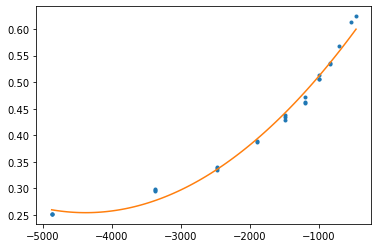

In [143]:
plt.plot(X,Y,'.')
X_ls = np.linspace(X[0],X[-1],100)
plt.plot(X_ls,quad_poly_model(X_ls,c1,c2,c3))

### Приближение квадратным многочленом значительно хуже в сравнении в исходной моделью